In [24]:
import os
import pathlib
import random

import matplotlib.pyplot as plt
import numpy as np
from keras import Sequential
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D, Rescaling
from keras.utils import image_dataset_from_directory

In [25]:
path = "../Dataset/"
data_dir = pathlib.Path(path)

In [26]:
class_names = np.array([sorted(item.name for item in data_dir.glob("*"))])
class_names

array([['Mild_Demented', 'Moderate_Demented', 'Non_Demented',
        'Very_Mild_Demented']], dtype='<U18')

In [27]:
imageCount = len(list(data_dir.glob("*/*.jpg")))
imageCount

6400

In [28]:
def plot(path, class_name):
    print(path)
    plt.figure(figsize=(8, 8))

    img = plt.imread(path)

    plt.xticks([])
    plt.yticks([])
    plt.title("Class Name: " + class_name)
    plt.imshow(img)

..\Dataset\Very_Mild_Demented\verymild_427.jpg


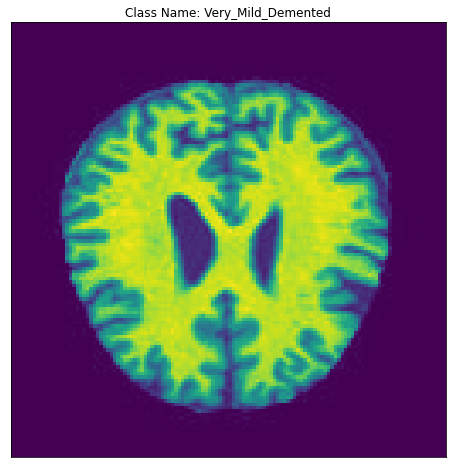

In [29]:
Very_Mild_Demented = random.choice(list(data_dir.glob("Very_Mild_Demented/*.jpg")))

plot(str(Very_Mild_Demented), "Very_Mild_Demented")

..\Dataset\Mild_Demented\mild_43.jpg


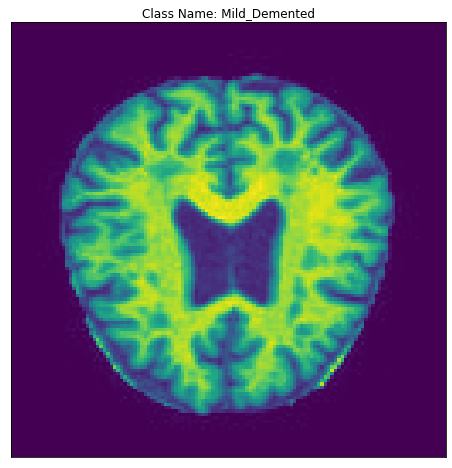

In [30]:
Mild_Demented = random.choice(list(data_dir.glob("Mild_Demented/*.jpg")))

plot(str(Mild_Demented), "Mild_Demented")

..\Dataset\Moderate_Demented\moderate_26.jpg


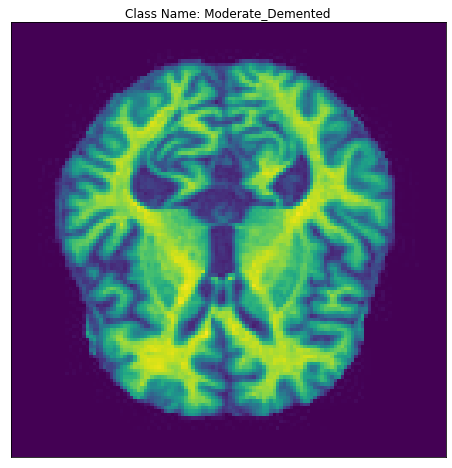

In [31]:
Moderate_Demented = random.choice(list(data_dir.glob("Moderate_Demented/*.jpg")))

plot(str(Moderate_Demented), "Moderate_Demented")

..\Dataset\Non_Demented\non_1335.jpg


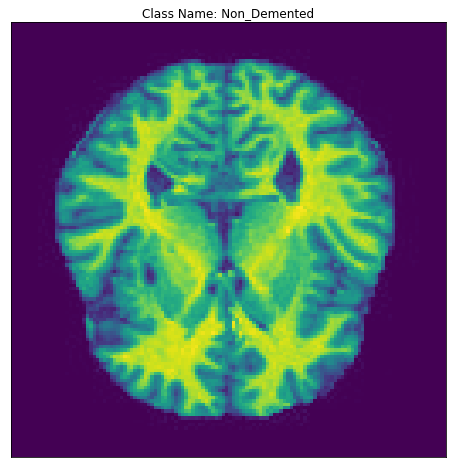

In [32]:
Non_Demented = random.choice(list(data_dir.glob("Non_Demented/*.jpg")))

plot(str(Non_Demented), "Non_Demented")

In [33]:
batch_size = 32
img_height = 128
img_width = 128

In [34]:
train_data = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)


val_data = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 6400 files belonging to 4 classes.
Using 5120 files for training.
Found 6400 files belonging to 4 classes.
Using 1280 files for validation.


In [36]:
model = Sequential(
    [
        Rescaling(1.0 / 128, input_shape=(img_height, img_width, 3)),
        Conv2D(16, 3, padding="same", activation="relu"),
        MaxPooling2D(),
        Conv2D(32, 3, padding="same", activation="relu"),
        MaxPooling2D(),
        Conv2D(64, 3, padding="same", activation="relu"),
        MaxPooling2D(),
        Dropout(0.5),
        Flatten(),
        Dense(128, activation="relu"),
        Dense(4, activation="softmax"),
    ]
)

In [37]:
model.compile(
    optimizer="Adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)

In [38]:
epochs = 5
history = model.fit(
    train_data,
    epochs=epochs,
    validation_data=val_data,
    batch_size=batch_size,
)

Epoch 1/5
160/160 [==============================] - 60s 353ms/step - loss: 0.9747 - accuracy: 0.5443 - val_loss: 0.8084 - val_accuracy: 0.6195
Epoch 2/5
160/160 [==============================] - 64s 402ms/step - loss: 0.8113 - accuracy: 0.6346 - val_loss: 0.6788 - val_accuracy: 0.7188
Epoch 3/5
160/160 [==============================] - 66s 411ms/step - loss: 0.6485 - accuracy: 0.7287 - val_loss: 0.5632 - val_accuracy: 0.7492
Epoch 4/5
160/160 [==============================] - 62s 387ms/step - loss: 0.5005 - accuracy: 0.7963 - val_loss: 0.3744 - val_accuracy: 0.8586
Epoch 5/5
160/160 [==============================] - 64s 396ms/step - loss: 0.3528 - accuracy: 0.8588 - val_loss: 0.2776 - val_accuracy: 0.8922


In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1

In [40]:
# find accuracy of model
accuracy = model.evaluate(val_data)

40/40 [==============================] - 3s 76ms/step - loss: 0.2776 - accuracy: 0.8922
Test accuracy: 0.8921874761581421


In [41]:

print(f"Test accuracy: {accuracy[1] * 100:.2f}%")

Test accuracy: 89.22%


In [ ]:
model.save("./model.h5")